<a href="https://colab.research.google.com/github/FrancescoCortopassi/copilot-codespaces-vscode/blob/main/LEZIONE_39.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


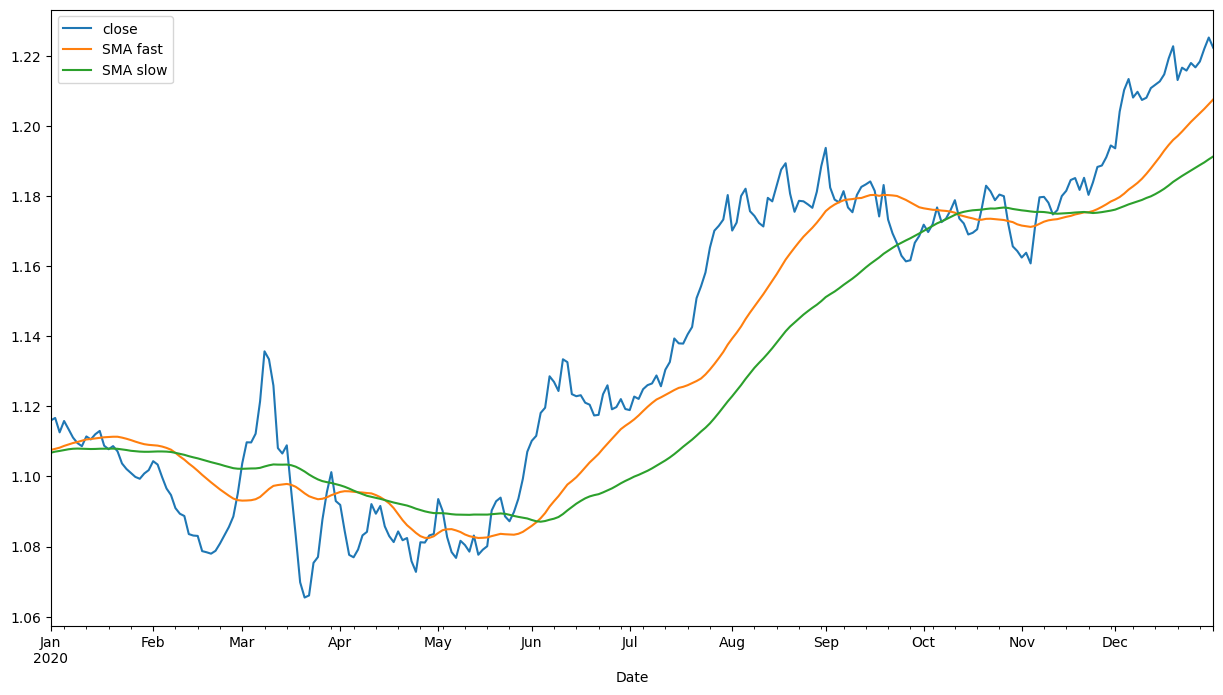

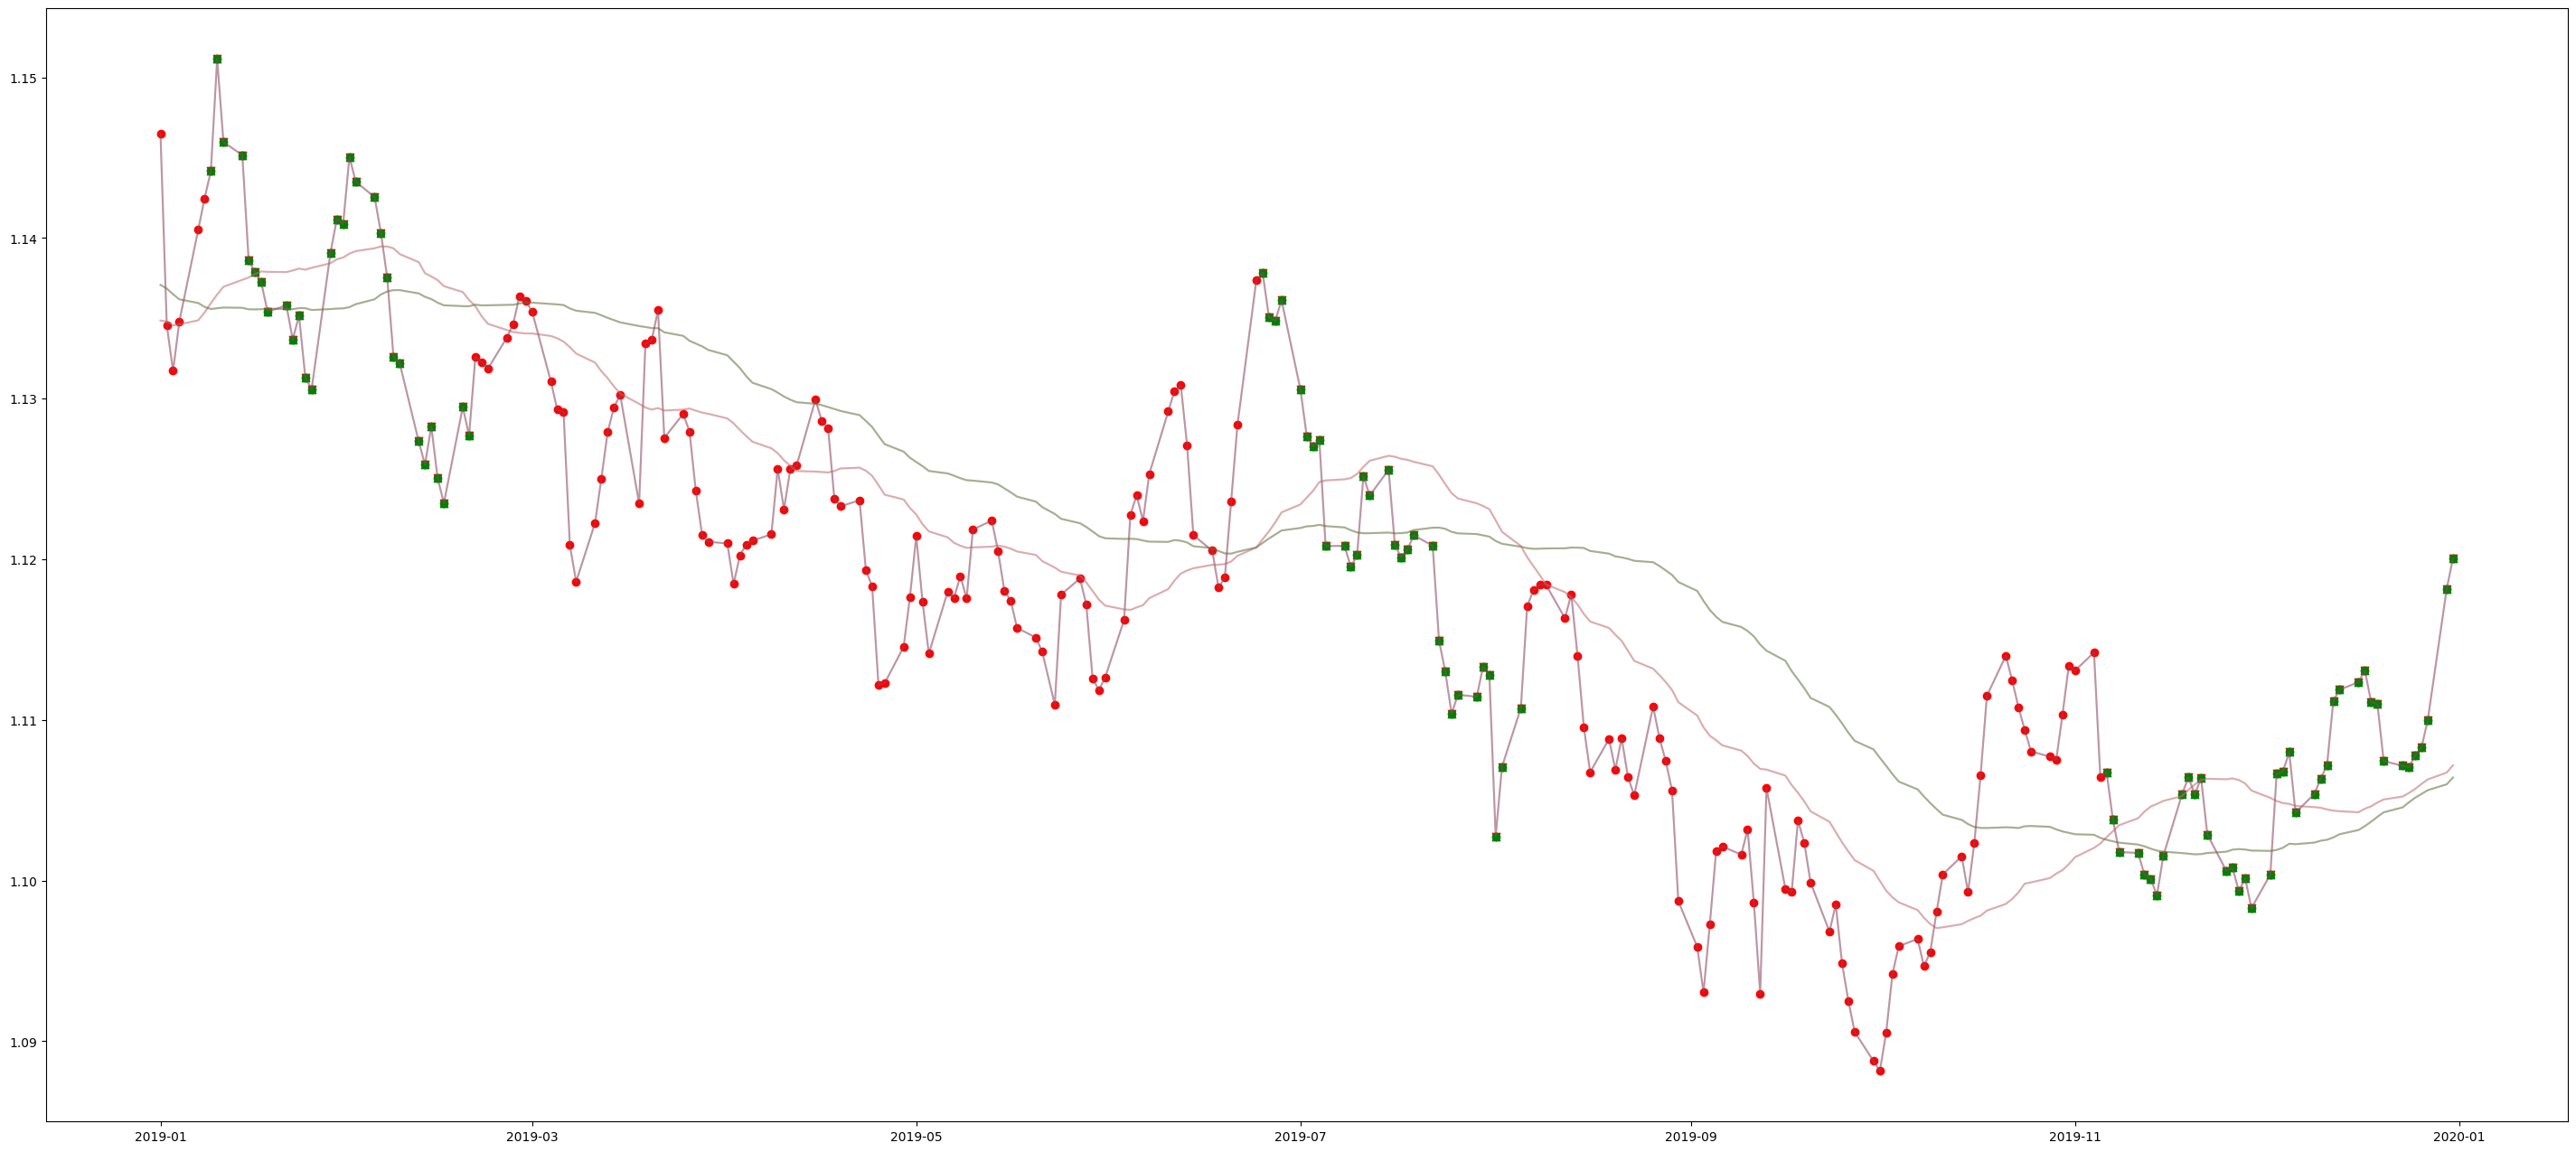

In [65]:
#In questa lezione si mostra come dati scaricati da differenti broker portino a RISULTATI DIFFERENTI
#Per testare intanto andiamo a ricreare la strategia di trading sull'SMA
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ("ignore")
df= yf.download ("EURUSD=X")
df.columns= ["open","high","close","low","volume"]
df["SMA fast"]= df ["close"].rolling(30).mean ()
df["SMA slow"]= df ["close"].rolling(60).mean ()
df[["close","SMA fast","SMA slow"]].loc ["2020"].plot (figsize =(15,8))

#definire la posizione
df["position"]= np.nan
#craere la condizione
df.loc [(df["SMA fast"]>df["SMA slow"]), "position"]= 1
df.loc [(df["SMA fast"]<df["SMA slow"]), "position"]= -1

#scegliere la finestra temporale
year="2019"
#selezionare un segnale nell'indice per plottarlo
idx_open= df.loc [df["position"]==1].loc [year].index
idx_close= df.loc [df["position"]==-1].loc [year].index

#dimensionare la SIZE del grafico con l'attributo figsize
plt.figure (figsize=(36,16))

#plottare i punti dell'apertura segnale BUY in verde e quelli SELL in rosso
plt. scatter (idx_open, df.loc [idx_open]["close"].loc[year],marker="^",color="green")
plt. scatter (idx_open, df.loc [idx_open]["close"].loc[year],marker="v",color="red")

#plottare anche le resistenze per essere sicuri che le condizioni siano complete
plt.plot (df["close"].loc [year].index, df["close"].loc [year], alpha= 0.35)
plt.plot (df["close"].loc [year].index, df["SMA fast"].loc [year], alpha= 0.35)
plt.plot (df["close"].loc [year].index, df["SMA slow"].loc [year], alpha= 0.35)

plt. scatter (idx_open, df.loc [idx_open]["close"].loc[year],color="green",marker="o") # Added '#' before the hexadecimal color code
plt. scatter (idx_close, df.loc [idx_close]["close"].loc[year],color="red",marker="o")
plt.plot (df["close"].loc [year].index, df["close"].loc [year], alpha= 0.35)
plt.plot (df["close"].loc [year].index, df["SMA fast"].loc [year], alpha= 0.35)
plt.plot (df["close"].loc [year].index, df["SMA slow"].loc [year], alpha= 0.35)
plt.show ()

In [45]:
#DA VERIFICARE: Copiando il codice dalle lezioni precedenti ed inserendolo in un'unica cella il grafico è stato plottato in maniera corrretta. Devo comprendere
#il perché questo sia accaduto

In [70]:
import pandas as pd

def SMA_strategy(input, MT5=False, yf=False):
    if MT5:
        df = preprocessing(input)
        # Ensure 'preprocessing' function returns DataFrame with 'close' column
        # Example:
        # df = pd.read_csv(input) # Assuming your csv has a 'close' column
        # ... any other preprocessing needed ...
    # ... rest of your code ...

In [75]:
#inserire entrambi i DataFrame per inserire poi un AXIS comune,
#così da droppare i valori mancanti
yahoo= SMA_strategy ("EURUSD=X", yf= True)
MT5= SMA_strategy ("EURUSD=X", MT5= True)



Original columns: Index(['<DATE>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>'], dtype='object')


In [84]:
metatrader= MT5
returns = pd.DataFrame([yahoo, metatrader], index=["Yahoo", "Broker"]).transpose().dropna().cumsum(axis=0)

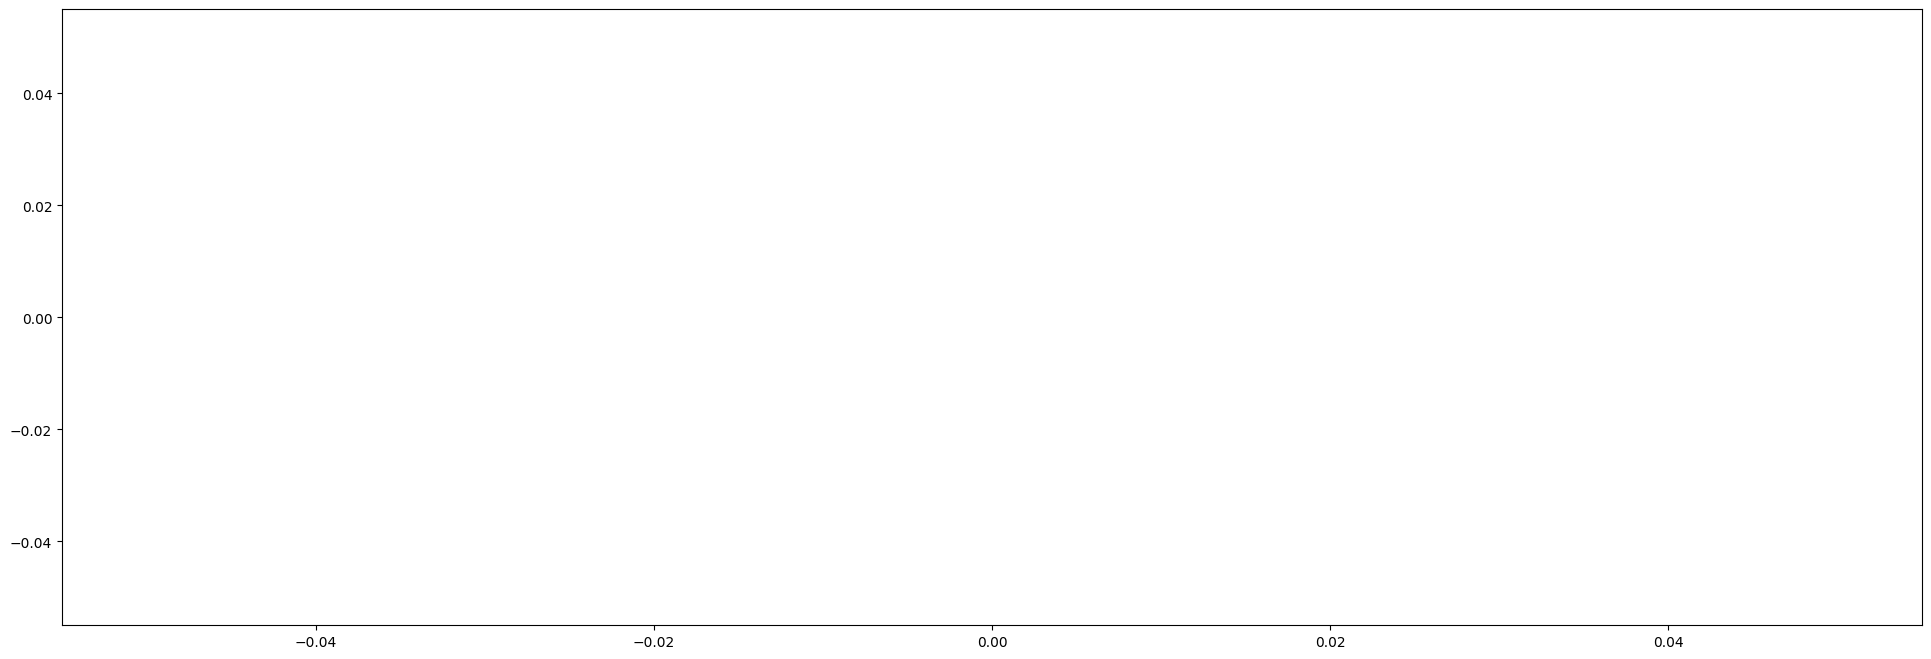

In [87]:
#plottare il grafico
plt.figure(figsize=(24,8))
#plottare i ritorni
plt.plot(returns["Yahoo"]*100, label="Yahoo")
plt.plot(returns["Broker"]*100, label="Broker")


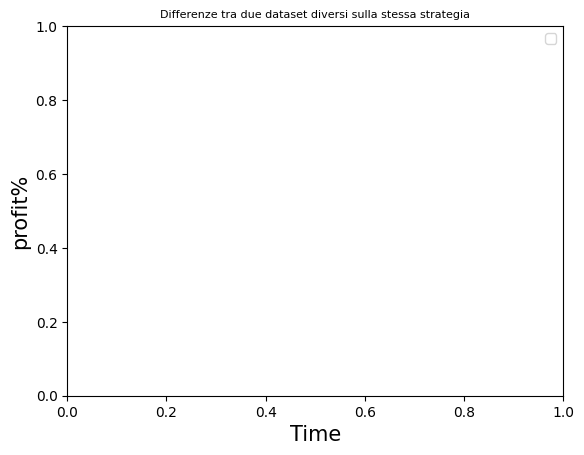

In [92]:
#Plottare i titoli delle AXIS
plt.xlabel ("Time",size=15)
plt.ylabel("profit%",size=15)
plt.title("Differenze tra due dataset diversi sulla stessa strategia",size=8)
plt.legend()
plt.show()

ERRORE: Non sono riuscito a produrre l'OUTPUT con i due grafici sovrapposti. Durante il prossimo ripasso verificare i passaggi e correggere l'errore